In [5]:
import torch
from math import *

defining Complex tensor

In [6]:
bra = torch.tensor([[1, 2.j], [-2, 1.j]])
bra

tensor([[ 1.+0.j,  0.+2.j],
        [-2.+0.j,  0.+1.j]])

Tensor Product

In [7]:
hadamard0 = torch.tensor([1, 1]).reshape(-1, 1)

torch.tensordot(hadamard0, hadamard0, dims = 0)

tensor([[[[1],
          [1]]],


        [[[1],
          [1]]]])

In [8]:
torch.tensor([1 / 3 -  1 / sqrt(3)]).conj().T * torch.tensor([1 / 3 -  1 / sqrt(3)])

/tmp/ipykernel_2819/2342840771.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995622/work/aten/src/ATen/native/TensorShape.cpp:3571.)
  torch.tensor([1 / 3 -  1 / sqrt(3)]).conj().T * torch.tensor([1 / 3 -  1 / sqrt(3)])


tensor([0.0595])

In [9]:
torch.tensor([1 / 3 -  1 / sqrt(3)]).conj().T * torch.tensor([1 / 3 -  1 / sqrt(3)])

tensor([0.0595])

In [10]:
rands = torch.randint(0, 16, (20, 1), dtype = torch.int64)

In [11]:
(rands == 3).sum()

tensor(2)

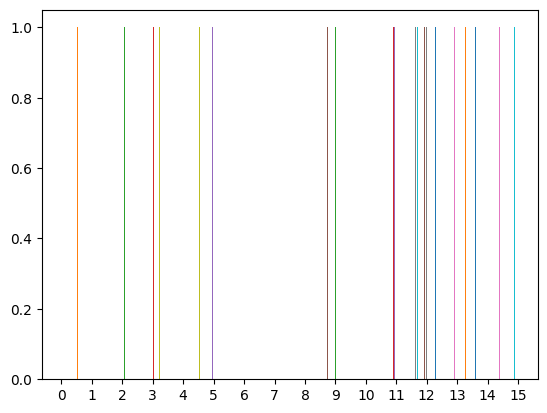

In [12]:
import matplotlib.pyplot as plt
plt.hist(rands, bins = 16);
plt.xticks(torch.arange(16));

In [13]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

c = torch.tensordot(a, b, dims=0)
c

tensor([[[[ 5,  6],
          [ 7,  8]],

         [[10, 12],
          [14, 16]]],


        [[[15, 18],
          [21, 24]],

         [[20, 24],
          [28, 32]]]])

Vector Representation

In [14]:
vector_i = 1/4 * torch.tensor([0, 1], dtype=torch.complex64) + 1/8 * torch.tensor([1, 0], dtype=torch.complex64)
# convert coefficients to list
vector_i = vector_i.tolist()
vector_i

[(0.125+0j), (0.25+0j)]

# Inner Product (Dirac Notation)

In [15]:
# Test
ket = torch.tensor([1, 2, 3.j]).reshape(-1, 1)
print(ket)

bra = torch.conj(ket).T
print(bra)

# inner product (Dirac notation)
inner_product = bra @ ket
print(inner_product)


tensor([[1.+0.j],
        [2.+0.j],
        [0.+3.j]])
tensor([[1.-0.j, 2.-0.j, 0.-3.j]])
tensor([[14.+0.j]])


In [16]:
def inner_product(bra, ket):
    return torch.conj(bra).T @ ket

In [17]:
def check_basis(vectors, normalize=False, verbose=True):
    """
    Check if the vectors are orthogonal and normalized (orthonormal basis)
    """ 
    # Check if all vectors are orthogonal (inner product is zero)
    orthogonal = all([inner_product(i, j) == 0 for i in vectors for j in vectors if i is not j])

    # Check if all vectors are normalized (inner product is one)
    normalized = all([inner_product(i, i) == 1 for i in vectors])

    # initial print
    if verbose:
        print(f'Vectors are orthogonal: {orthogonal} | Vectors are normalized: {normalized}')

    # if the vectors are not normalized, normalize them
    if not normalized and normalize and orthogonal:
        # normalize vectors (divide by the norm)
        vectors = [i / torch.sqrt(inner_product(i, i)) for i in vectors]
        if verbose:
            print('Vectors are orthogonal but not normalized. Normalizing...')
            print(f"vectors after normalization:")
            for i in vectors:
                print(i)

    return orthogonal and normalized


In [18]:
# Ex1: Computational basis (1 qubit)
vector1 = torch.tensor([0, 1]).reshape(-1, 1)
vector2 = torch.tensor([1, 0]).reshape(-1, 1)

check_basis([vector1, vector2], True);

Vectors are orthogonal: True | Vectors are normalized: True


In [19]:
# Ex2: Hadamard basis (1 qubit)
vector1 = torch.tensor([1, 1]).reshape(-1, 1)
vector2 = torch.tensor([1, -1]).reshape(-1, 1)

check_basis([vector1, vector2], True);

Vectors are orthogonal: True | Vectors are normalized: False
Vectors are orthogonal but not normalized. Normalizing...
vectors after normalization:
tensor([[0.7071],
        [0.7071]])
tensor([[ 0.7071],
        [-0.7071]])


In [20]:
# Ex3: 2 qubit basis
vector1 = torch.tensor([1, 0, 0, 0]).reshape(-1, 1)
vector2 = torch.tensor([0, 1, 0, 0]).reshape(-1, 1)
vector3 = torch.tensor([0, 0, 1, 0]).reshape(-1, 1)
vector4 = torch.tensor([0, 0, 0, 1]).reshape(-1, 1)

check_basis([vector1, vector2, vector3, vector4], True);

Vectors are orthogonal: True | Vectors are normalized: True


# Test from helpers

In [1]:
from helpers import *
import torch
from math import *

In [2]:
x = torch.tensor([[1 / 3, 1.j/3], [-1.j / 3, 2 / 3]])
determine_state(x)

Trace of P^2 is (0.7777777910232544+0j)
State is mixed


True

In [3]:
y = torch.tensor([[3 / 4, sqrt(3) / 4], [sqrt(3) / 4, 1 / 4]])
determine_state(x)

Trace of P^2 is (0.7777777910232544+0j)
State is mixed


True